In [1]:
import os
pathtogs='C:\\Program Files\\gs\\gs9.24\\bin'
os.environ['PATH']+=os.pathsep+pathtogs

### Question 1

In [2]:
#Read the dataset
import pandas as pd
df=pd.read_csv('Tweets.csv')
df=df[['text','airline_sentiment']]

In [3]:
import re
r = re.compile(r"([@])(\w+)\b")

AllReferences=map(lambda x: r.findall(x),df['text'])

import itertools
AllUniqueReferencesCombined=set(list(itertools.chain.from_iterable(AllReferences)))

References=map(lambda x:x[0]+x[1],AllUniqueReferencesCombined)

file=open("References.txt",'a')
for each in References:
    file.write(each+"\n")
file.close()

### Question 2

In [7]:
import nltk
def GetNounPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []

    else:
        
        grammar=r"NP:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"

        cp = nltk.RegexpParser(grammar)


        noun_phrases_list = [[' '.join(leaf[0] for leaf in tree.leaves()) 
                              for tree in cp.parse(sent).subtrees() 
                              if tree.label()=='NP'] 
                              for sent in sentences]
        return noun_phrases_list

import itertools
for group,sub in df.groupby('airline_sentiment'):
    noun_phrases=map(lambda x: GetNounPhrases(x),sub['text'])
    noun_phrases=list(itertools.chain.from_iterable(noun_phrases))
    AllNounPhrases=set(list(itertools.chain.from_iterable(noun_phrases)))
    filename="Noun Phrases for "+str(group)+" Review .txt"
    file=open(filename,'a')
    for each in AllNounPhrases:
        file.write(each+"\n")
    file.close()    

# Question 3

In [8]:
import nltk
def GetVerbPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []

    else:
        
        grammar=r"VP:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"

        cp = nltk.RegexpParser(grammar)


        noun_phrases_list = [[' '.join(leaf[0] for leaf in tree.leaves()) 
                              for tree in cp.parse(sent).subtrees() 
                              if tree.label()=='VP'] 
                              for sent in sentences]
        return noun_phrases_list
    
import itertools
for group,sub in df.groupby('airline_sentiment'):
    verb_phrases=map(lambda x: GetVerbPhrases(x),sub['text'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases=set(list(itertools.chain.from_iterable(verb_phrases)))
    filename="Verb Phrases for "+str(group)+" Review .txt"
    file=open(filename,'a')
    for each in AllVerbPhrases:
        file.write(each+"\n")
    file.close()    

# Question 4

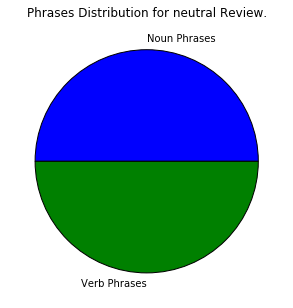

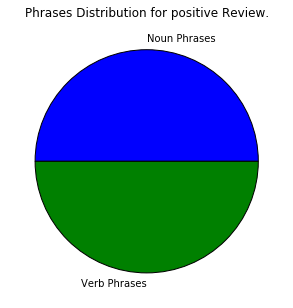

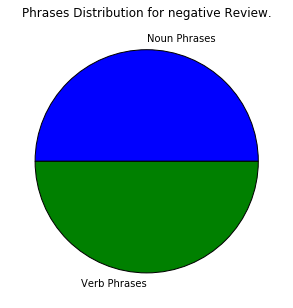

In [13]:
#Plotting a pie chart
def PlotPieChart(sentiment):
    noun_phrase_file="Noun Phrases for "+str(sentiment)+" Review .txt"
    verb_phrase_file="Verb Phrases for "+str(sentiment)+" Review .txt"
    noun_phrase_count=len(noun_phrase_file.split("\n"))
    verb_phrase_count=len(verb_phrase_file.split("\n"))
    counts=[noun_phrase_count,verb_phrase_count]
    labels=['Noun Phrases','Verb Phrases']

    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.pie(counts,labels=labels)
    plt.title("Phrases Distribution for "+str(sentiment)+" Review.")
    plt.show()

for each in df['airline_sentiment'].unique():
    PlotPieChart(each)